#**Exploratory Data Analysis Step-by-Step Method**#

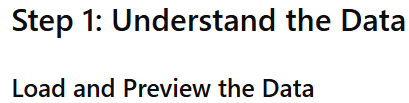

Data Set Scenario:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

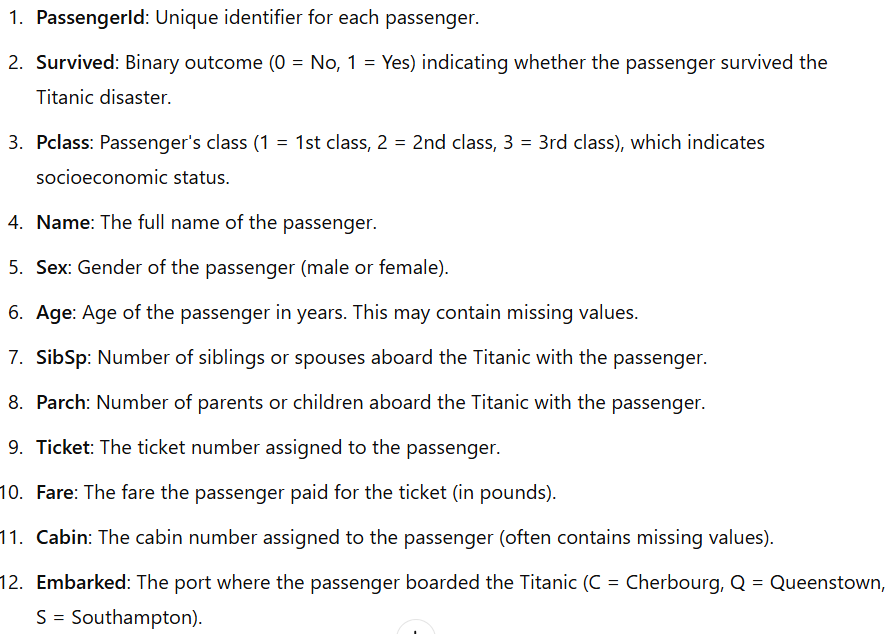

13. **Alone:** A binary feature indicating whether the passenger was alone (1) or with family (0), derived from FamilySize.

These columns provide valuable information to predict whether a passenger survived or not based on demographic, socioeconomic, and familial relationships. Preprocessing these features (handling missing values, encoding categorical variables, etc.) is key to developing an effective prediction model.

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Preview the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Dataset contains 891 rows and 15 columns.


In [ ]:
df.shape

(891, 15)

In [ ]:
df = df.rename(columns={'sex': 'gender'})

In [ ]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
df

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


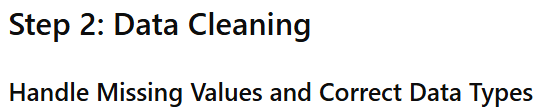

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
#print(missing_values)
print(missing_values[missing_values > 0])

# Drop columns with a high number of missing values (e.g., 'deck')
df.drop(columns=['deck'], inplace=True)

# # Fill missing values in 'age' with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# # Drop rows with missing 'embarked' values
df.dropna(subset=['embarked'], inplace=True)

# # Drop rows with missing 'embarked' values
df.dropna(subset=['embark_town'], inplace=True)

# # Correct data types if needed (example: 'sex' to category)
df['gender'] = df['gender'].astype('category')


age            177
embarked         2
deck           688
embark_town      2
dtype: int64


<ipython-input-13-b3f3eae8ffa7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [ ]:
(1+3+5+9+60+90)/6

28.0

In [ ]:
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   gender       889 non-null    category
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 80.1+ KB


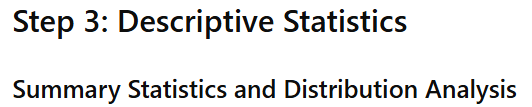

         survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.315152    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.984932    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
gender
male      577
female    312
Name: count, dtype: int64


<Axes: xlabel='age', ylabel='Count'>

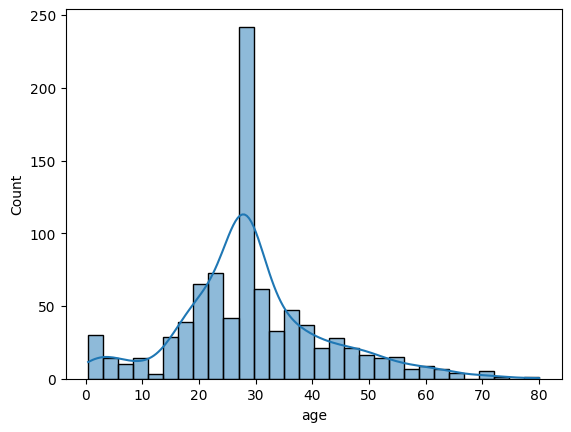

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Value counts for categorical columns
print(df['gender'].value_counts())

# Distribution of 'age'
sns.histplot(df['age'], kde=True)


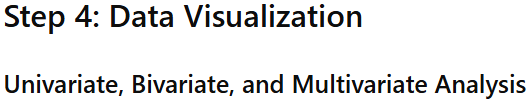

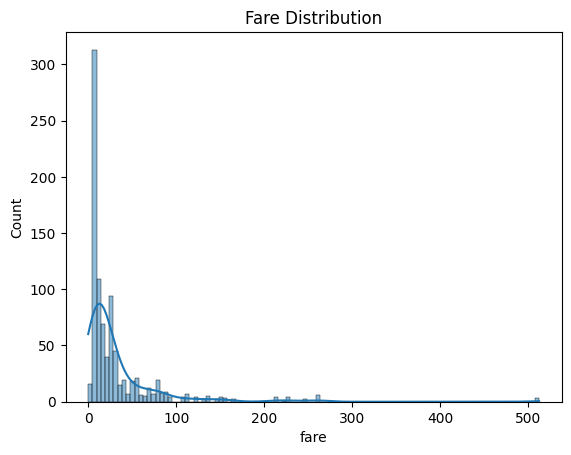

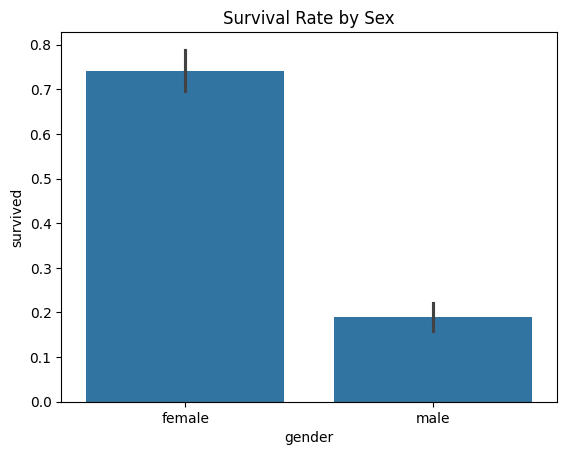

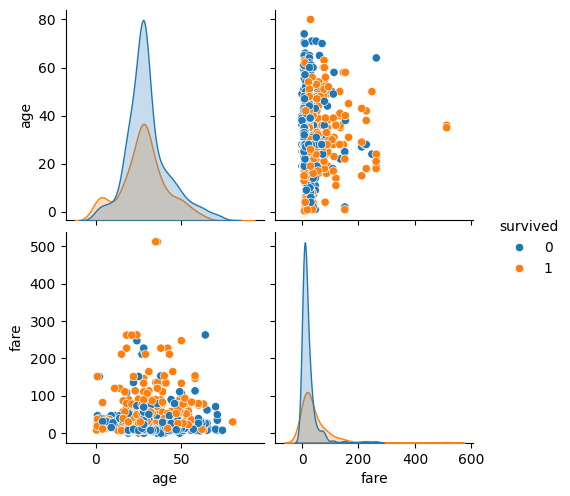

In [ ]:
import matplotlib.pyplot as plt

# Univariate analysis: Distribution of 'fare'
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Bivariate analysis: Survival rate by 'sex'
sns.barplot(x='gender', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Multivariate analysis: Pair plot of numerical features
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()


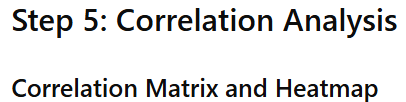

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['embarked'] = labelencoder.fit_transform(df['embarked'])
df['gender'] = labelencoder.fit_transform(df['gender'])
df['class'] = labelencoder.fit_transform(df['class'])
df['who'] = labelencoder.fit_transform(df['who'])
df['adult_male']=labelencoder.fit_transform(df['adult_male'])
df['alive']=labelencoder.fit_transform(df['alive'])
df['embark_town']=labelencoder.fit_transform(df['embark_town'])
df['alone']=labelencoder.fit_transform(df['alone'])


In [ ]:
df # Displaying whether the data has converted into numeric

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,2,1,1
888,0,3,0,28.0,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,0,1,1


In [ ]:
import matplotlib.pyplot as plt

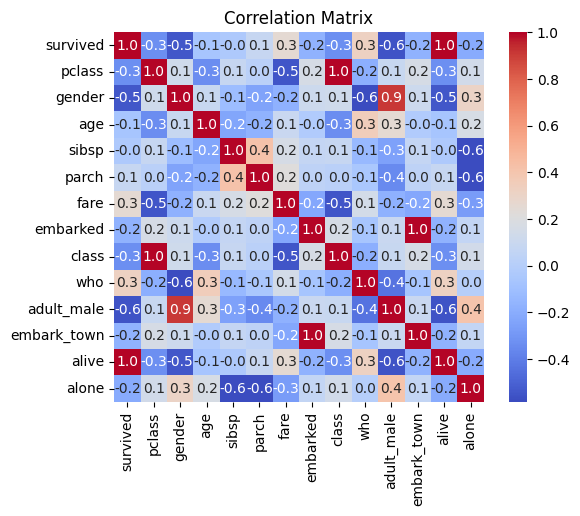

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,-0.169718,-0.335549,0.323191,-0.555520,-0.169718,1.000000,-0.206207
pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681,1.000000,-0.193029,0.090098,0.164681,-0.335549,0.138553
gender,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,0.110320,0.127741,-0.638309,0.908250,0.110320,-0.541585,0.306985
age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.020933,-0.336512,0.347428,0.253491,-0.020933,-0.069822,0.169518
sibsp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,0.068900,0.081656,-0.134887,-0.255401,0.068900,-0.034040,-0.584186
parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,0.040449,0.016824,-0.054389,-0.351945,0.040449,0.083151,-0.583112
fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,-0.226311,-0.548193,0.143849,-0.179851,-0.226311,0.255290,-0.274079
embarked,-0.169718,0.164681,0.110320,-0.020933,0.068900,0.040449,-0.226311,1.000000,0.164681,-0.066062,0.094347,1.000000,-0.169718,0.062532
class,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681,1.000000,-0.193029,0.090098,0.164681,-0.335549,0.138553
who,0.323191,-0.193029,-0.638309,0.347428,-0.134887,-0.054389,0.143849,-0.066062,-0.193029,1.000000,-0.435459,-0.066062,0.323191,0.004125


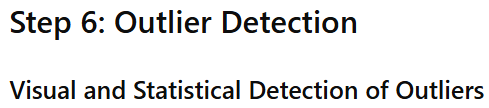

List = [2,5,7,6,14,12,3,4,1,8,15,9,7,9,15,12,13,18,17,16,19,18]

S= [1,2,3,4,5,6,|7,7,8,9,9,|12,12,13,14,15,15,|16,17,18,18,19]

       Q1           Q2              Q3               Q4
       
Q1 (25 Percentile) = 6 (25 % of the data set contains the values <= 6)

Q2 (50 Percentile) = 9  (50 % of the data set contains the values <=9)

Q3 (75 Percentile) = 15 (75 % of the data set contains the value <=15)

Q4 (100 Percentile) = 19 (100 % of the data set contains the value <= 19)

Percentage / Percentile

IQR = Q3 - Q1

Upper limit = Q3 + (1.5)IQR

Lower Limit = Q1 - (1.5)IQR

In [ ]:
L= [2,5,7,6,14,12,3,4,1,8,15,9,7,9,15,12,13,18,17,16,19,18]
L.sort()
print(L)
print(len(L))

[1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 9, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19]
22


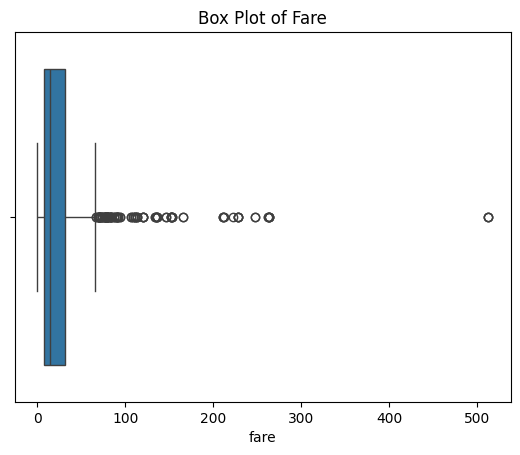

Number of outliers in fare: 20


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['fare'])
plt.title('Box Plot of Fare')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['fare']))
outliers = df[z_scores > 3]
print(f'Number of outliers in fare: {outliers.shape[0]}')


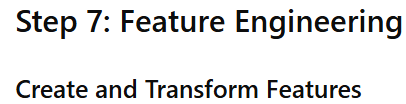

In [ ]:
# Create a new feature 'family_size'
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Log transformation of 'fare' to reduce skewness
df['log_fare'] = np.log1p(df['fare'])  # Calculating the natural logarithm

# One-hot encode categorical variables (e.g., 'embarked')
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)


In [ ]:
df

,survived,pclass,gender,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_size,log_fare,embarked_1,embarked_2
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0,0,2,2.110213,False,True
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,1,0,2,4.280593,False,False
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1,1,1,2.188856,False,True
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,1,0,2,3.990834,False,True
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,0,1,1,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,1,1,2,0,1,1,2.639057,False,True
887,1,1,0,19.0,0,0,30.0000,0,2,0,2,1,1,1,3.433987,False,True
888,0,3,0,28.0,1,2,23.4500,2,2,0,2,0,0,4,3.196630,False,True
889,1,1,1,26.0,0,0,30.0000,0,1,1,0,1,1,1,3.433987,False,False


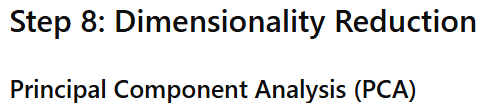

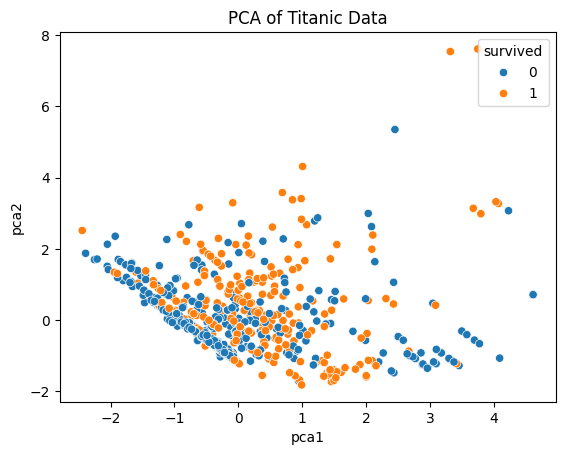

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['age', 'fare', 'family_size']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='survived', data=df)
plt.title('PCA of Titanic Data')
plt.show()


In [ ]:
X

array([[-0.56367407, -0.50023975,  0.05785331],
       [ 0.66921696,  0.78894661,  0.05785331],
       [-0.25545131, -0.48664993, -0.5618044 ],
       ...,
       [-0.10133993, -0.17408416,  1.29716872],
       [-0.25545131, -0.0422126 , -0.5618044 ],
       [ 0.20688282, -0.49017322, -0.5618044 ]])

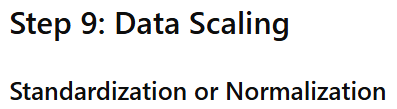

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['age_normalized', 'fare_normalized']] = minmax_scaler.fit_transform(df[['age', 'fare']])

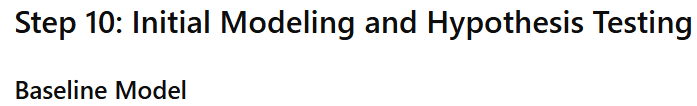

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['age', 'fare', 'family_size']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')


Baseline model accuracy: 0.67


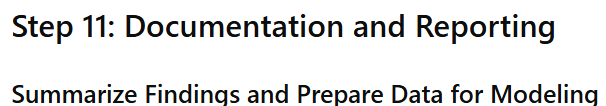

In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with Survival': df.corr()['survived'].sort_values(ascending=False)
}

print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

# Prepare final dataset for modeling
final_df = df[['age', 'fare', 'family_size', 'survived']]


EDA Summary:
Dataset Shape: (889, 23)
Missing Values: 0
Correlation with Survival: survived           1.000000
alive              1.000000
log_fare           0.327042
who                0.323191
fare               0.255290
fare_scaled        0.255290
fare_normalized    0.255290
pca2               0.140401
pca1               0.136095
parch              0.083151
family_size        0.018277
embarked_1         0.004536
sibsp             -0.034040
age               -0.069822
age_scaled        -0.069822
age_normalized    -0.069822
embarked_2        -0.151777
embark_town       -0.169718
alone             -0.206207
pclass            -0.335549
class             -0.335549
gender            -0.541585
adult_male        -0.555520
Name: survived, dtype: float64
